In [472]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.common import SettingWithCopyWarning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers

In [473]:
data =pd.read_csv('/content/drive/MyDrive/python/data/cardio_train.csv',sep=";")
# load the data
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [474]:
#결측치 확인
data.isnull().sum()

#이상치 제거
#age
age_mean = data['age'].mean()
age_std = data['age'].std()
indexNames = data[data['age'] < age_mean - 3*age_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['age'] > age_mean + 3*age_std].index
data.drop(indexNames , inplace=True)
print('age:',data.shape)
#gender
gen_mean = data['gender'].mean()
gen_std = data['gender'].std()
indexNames = data[data['gender'] < gen_mean - 3*gen_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['gender'] > gen_mean + 3*gen_std].index
data.drop(indexNames , inplace=True)
print('gender:',data.shape)
#height
height_mean = data['height'].mean()
height_std = data['height'].std()
indexNames = data[data['height'] < height_mean - 3*height_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['height'] > height_mean + 3*height_std].index
data.drop(indexNames , inplace=True)
print('height:',data.shape)
#weight
weight_mean = data['weight'].mean()
weight_std = data['weight'].std()
indexNames = data[data['weight'] < weight_mean - 3*weight_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['weight'] > weight_mean + 3*weight_std].index
data.drop(indexNames , inplace=True)
print('weight:',data.shape)
#bp
bp_mean = data['ap_hi'].mean()
bp_std = data['ap_hi'].std()
indexNames = data[data['ap_hi'] < bp_mean - 3*bp_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['ap_hi'] > bp_mean + 3*bp_std].index
data.drop(indexNames , inplace=True)

bp_mean = data['ap_lo'].mean()
bp_std = data['ap_lo'].std()
indexNames = data[data['ap_lo'] < bp_mean - 3*bp_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['ap_lo'] > bp_mean + 3*bp_std].index
data.drop(indexNames , inplace=True)
print('bp:',data.shape)
#cholesterol
cholesterol_mean = data['cholesterol'].mean()
cholesterol_std = data['cholesterol'].std()
indexNames = data[data['cholesterol'] < cholesterol_mean - 3*cholesterol_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['cholesterol'] > cholesterol_mean + 3*cholesterol_std].index
data.drop(indexNames , inplace=True)
print('cholesterol:',data.shape)
#glucose
gluc_mean = data['gluc'].mean()
gluc_std = data['gluc'].std()
indexNames = data[data['gluc'] < gluc_mean - 3*gluc_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['gluc'] > gluc_mean + 3*gluc_std].index
data.drop(indexNames , inplace=True)
print('glucose:',data.shape)
#smoke
smoke_mean = data['smoke'].mean()
smoke_std = data['smoke'].std()
indexNames = data[data['smoke'] < smoke_mean - 3*smoke_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['smoke'] > smoke_mean + 3*smoke_std].index
data.drop(indexNames , inplace=True)
print('smoke:',data.shape)
#alcohol
alco_mean = data['alco'].mean()
alco_std = data['alco'].std()
indexNames = data[data['alco'] < alco_mean - 3*alco_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['alco'] > alco_mean + 3*alco_std].index
data.drop(indexNames , inplace=True)
print('alcohol:',data.shape)
#activity
active_mean = data['active'].mean()
active_std = data['active'].std()
indexNames = data[data['active'] < active_mean - 3*active_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['active'] > active_mean + 3*active_std].index
data.drop(indexNames , inplace=True)
print('activity:',data.shape)
#cardio
cardio_mean = data['cardio'].mean()
cardio_std = data['cardio'].std()
indexNames = data[data['cardio'] < cardio_mean - 3*cardio_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['cardio'] > cardio_mean + 3*cardio_std].index
data.drop(indexNames , inplace=True)
print('cardio:',data.shape)

age: (69996, 13)
gender: (69996, 13)
height: (69703, 13)
weight: (69024, 13)
bp: (68067, 13)
cholesterol: (68067, 13)
glucose: (62937, 13)
smoke: (57373, 13)
alcohol: (55699, 13)
activity: (55699, 13)
cardio: (55699, 13)


In [475]:
#As you can see there are no null values in the data frame. Delete the 'id' feature that does not provide important information.
data=data.drop(['id','cardio'],axis=1)
#The 'Age' feature counts age by days. Convert it to age by years.
data['age']=data['age']/365
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50.391781,2,168,62.0,110,80,1,1,0,0,1
1,55.419178,1,156,85.0,140,90,3,1,0,0,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0
3,48.282192,2,169,82.0,150,100,1,1,0,0,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0


In [476]:
info_chole_gluc = data[['age','gender','height','weight','ap_hi','ap_lo',
                        'smoke','alco','active']]
chole_gluc = data[['cholesterol','gluc']]

# creating train and test sets
train_info_chole_gluc = info_chole_gluc[:50000]
train_chole_gluc = chole_gluc[:50000]

test_info_chole_gluc = info_chole_gluc[50000:]
test_chole_gluc = chole_gluc[50000:]

print(info_chole_gluc.shape, chole_gluc.shape)
print(train_info_chole_gluc.shape, train_chole_gluc.shape,test_info_chole_gluc.shape, test_chole_gluc.shape)

(55699, 9) (55699, 2)
(50000, 9) (50000, 2) (5699, 9) (5699, 2)


In [477]:
model = Sequential()

x = tf.keras.layers.Input(shape=[9])
h = tf.keras.layers.Dense(32, activation='relu')(x)
h = tf.keras.layers.Dense(32, activation='relu')(h)
y = tf.keras.layers.Dense(2)(h)
model = tf.keras.models.Model(x,y)
model.compile(loss='Huber', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(train_info_chole_gluc, train_chole_gluc, epochs=100, verbose=1)

model.save('chole_gluc_predict.h5')

Model: "model_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_58 (InputLayer)        [(None, 9)]               0         
_________________________________________________________________
dense_171 (Dense)            (None, 32)                320       
_________________________________________________________________
dense_172 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_173 (Dense)            (None, 2)                 66        
Total params: 1,442
Trainable params: 1,442
Non-trainable params: 0
_________________________________________________________________
1563/1563 [==============================] - 3s 2ms/step - loss: 2.2873 - accuracy: 0.6368


In [478]:
# test_info_chole_gluc = model.predict(test_info_chole_gluc)
# print(test_info_chole_gluc)
# print(test_chole_gluc)

test_info_chole_gluc = model.predict(test_info_chole_gluc)
test_info_chole_gluc = pd.DataFrame(test_info_chole_gluc, columns=['cholesterol','gluc'])

# test_chole_gluc1
test_info_chole_gluc.to_csv('chole_gluc.csv',index=False, header=True)
chole_gluc=pd.read_csv('chole_gluc.csv')
print(chole_gluc)
print(test_chole_gluc)

      cholesterol      gluc
0        1.115891  1.062580
1        1.055750  1.069886
2        1.266258  1.132291
3        1.111878  1.122567
4        1.399802  1.251992
...           ...       ...
5694     1.225673  1.028267
5695     1.130783  1.115188
5696     1.323981  1.152759
5697     1.228675  1.124390
5698     1.130920  1.092780

[5699 rows x 2 columns]
       cholesterol  gluc
62807            1     1
62808            2     2
62810            1     1
62811            1     1
62812            1     1
...            ...   ...
69992            1     1
69993            1     1
69994            1     1
69998            1     2
69999            2     1

[5699 rows x 2 columns]


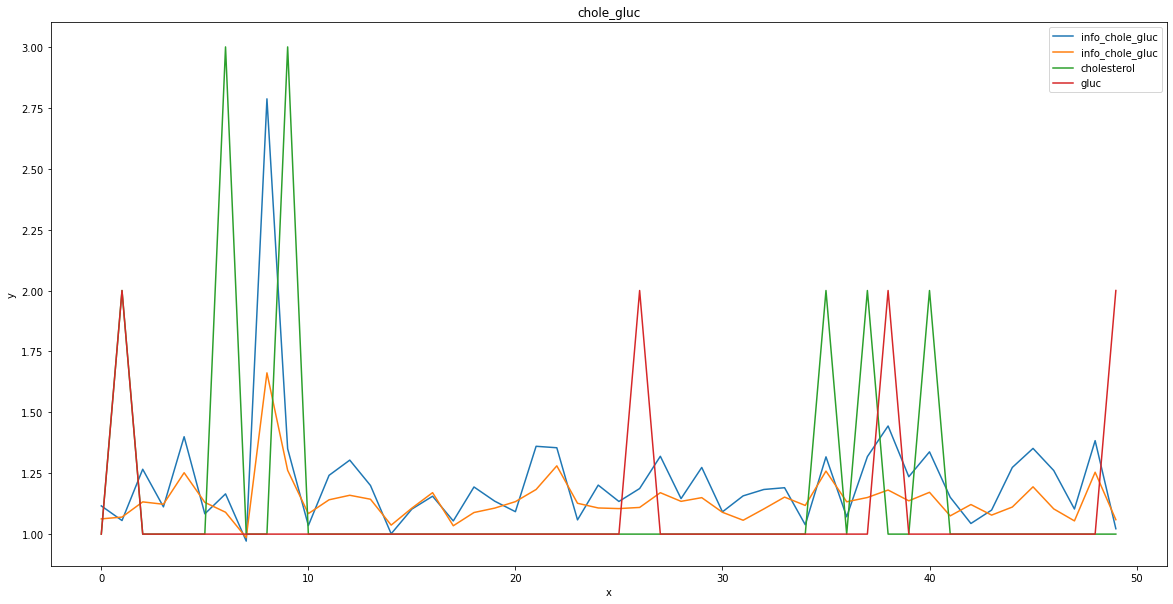

In [479]:
test_info_chole_gluc = test_info_chole_gluc[:50]

test_chole = test_chole_gluc['cholesterol']
test_gluc = test_chole_gluc['gluc']
test_chole = test_chole.tolist()
test_gluc = test_gluc.tolist()
test_chole = test_chole[:50]
test_gluc = test_gluc[:50]

plt.figure(figsize=(20,10))
plt.plot(test_info_chole_gluc, label='info_chole_gluc')
plt.plot(test_chole, label='cholesterol')
plt.plot(test_gluc, label='gluc')
plt.xlabel('x')
plt.ylabel('y')
plt.title('chole_gluc')
plt.legend()

plt.show()

In [480]:
# test_chole_gluc1 = pd.DataFrame(columns=['cholesterol','gluc'])
# test_chole_gluc1['cholesterol'] = test_chole
# test_chole_gluc1['gluc'] = test_gluc
# # test_chole_gluc1
# test_chole_gluc1.to_csv('chole_gluc1.csv',index=False, header=True)
# chole_gluc1=pd.read_csv('chole_gluc.csv')
#print(chole_gluc1)
#print(chole_gluc)